# <div align="center"> <font color= 'Red'> PROJE 4
#  <div align="center"> <font color= 'Red'> Customer Segmentation Research

## Contents
1.  The Aim of Analysis
2.  General Information of the Data
3.  Data Exploration
4.  Overview about Outliers
5.  Checking for NULL Values 
6.  Filling of the Row Data 
7.  Clustering Methods
     * 7.1 Kmeans
       * 7.1.a   Determining Number of Clusters with Elbow Method
       * 7.1.b   Determining Number of Clusters with Silhouette Scores Method
       * 7.1.c   Kmeans Clustering
     * 7.2 Hierarchical Clustering
     * 7.3 DBSCAN
     * 7.4 Spectral Clustering
     * 7.5 GMM
8.  Compering Results for the Optimal Number of Cluster Model     
9.  DIMENSION REDUCTION
     * 9.1 PCA
     * 9.2 T-SNE
     * 9.3 UMAP

10. Understanding Clusters by Customer Segmentation in 3 Different Kmeans Models
    * 10.1 Kmeans Model with 8 Clusters
    * 10.2 Kmeans Model with 4 Clusters
11. Conclusion 


## <div align="center"> <font color= 'blue'> 1.The Aim of Analysis
                              
This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
This study also aims to see different Machine Learning Methods on the same data set. 

## <div align="center"> <font color= 'blue'> 2.  General Information of the Data

**CUST_ID :** Identification of Credit Card holder (Categorical)

**BALANCE :** Balance amount left in their account to make purchases (

**BALANCE_FREQUENCY :** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES :** Amount of purchases made from account

**ONEOFF_PURCHASES :** Maximum purchase amount done in one-go

**INSTALLMENTS_PURCHASES :** Amount of purchase done in installment

**CASH_ADVANCE :** Cash in advance given by the user

**PURCHASES_FREQUENCY :** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY :** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY :** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY :** How frequently the cash in advance being paid

**CASHADVANCETRX :** Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX :** Numbe of purchase transactions made

**CREDIT_LIMIT :** Limit of Credit Card for user

**PAYMENTS :** Amount of Payment done by user

**MINIMUM_PAYMENTS :** Minimum amount of payments made by user

**PRCFULLPAYMENT :** Percent of full payment paid by user

**TENURE :** Tenure of credit card service for user

**The credit card data has 17 attributes for each customer which include the balance (credit owed by the customer), cash advance (when a customer withdraws cash using the credit card), the customer’s credit limit, minimum payment, percentage of full payments and tenure.**


In [1]:
#installment packages

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering



import warnings
warnings.filterwarnings("ignore")

## <div align="center"> <font color= 'blue'> 3.  Data Exploration 

In [2]:
df = pd.read_csv("../input/ccdata/CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.drop("CUST_ID", axis=1, inplace=True)

In [5]:
df.shape

(8950, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [7]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [10]:
df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']].nunique()

CASH_ADVANCE_TRX     65
PURCHASES_TRX       173
TENURE                7
dtype: int64

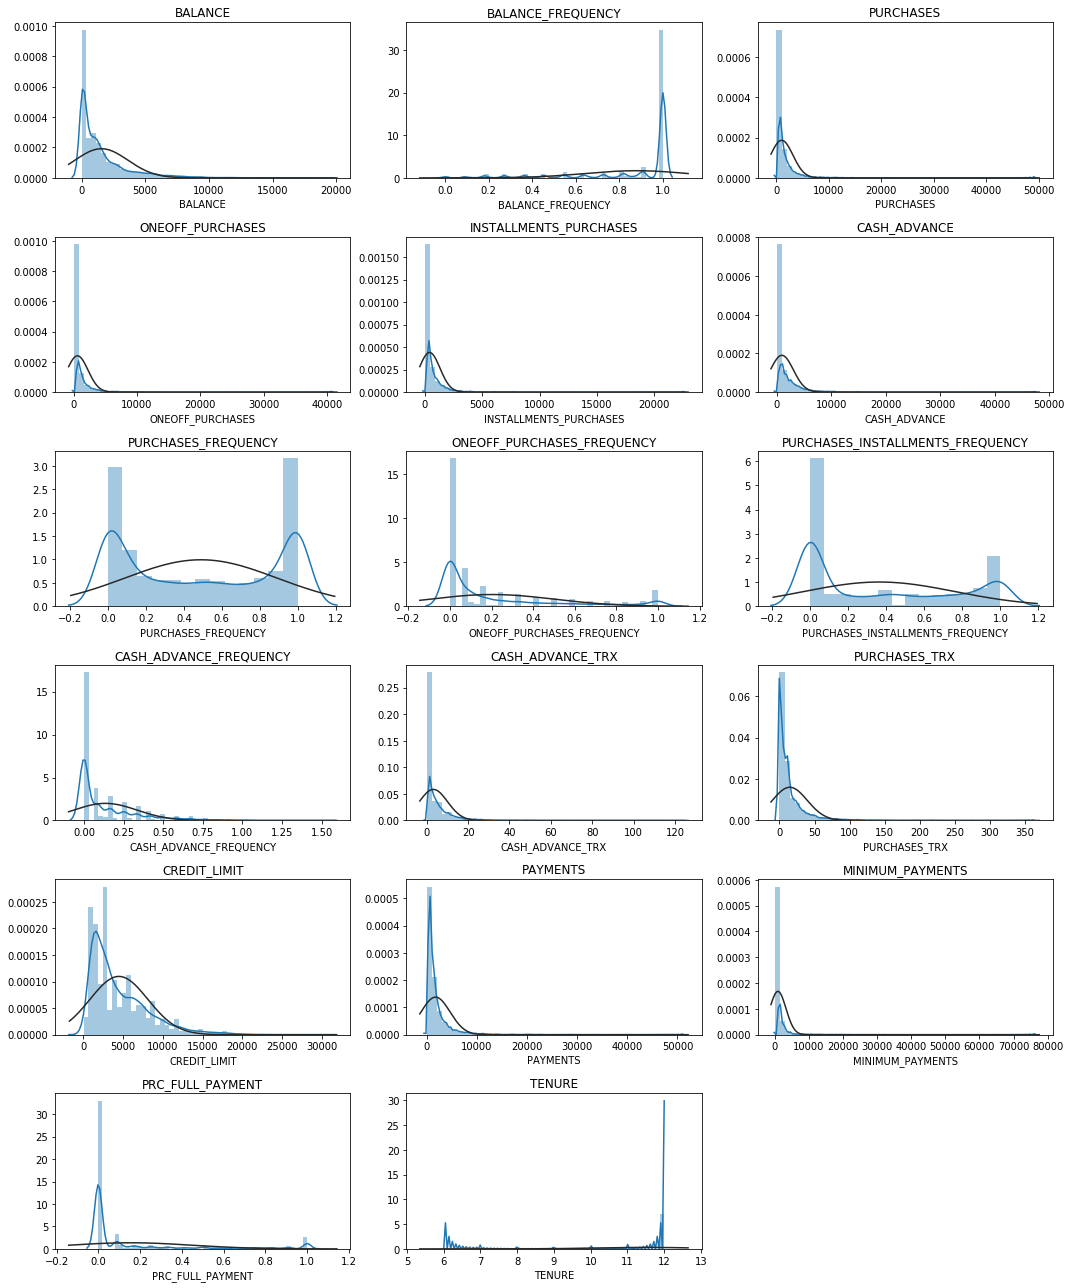

In [11]:
#A quick check on vriables

from scipy.stats import norm 

graph_by_variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(df[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()
    

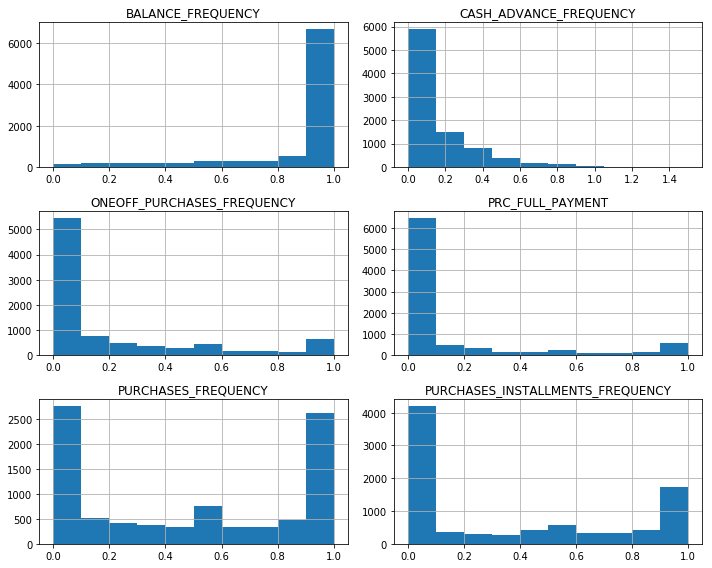

In [12]:
#Frequency variables in charts

df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

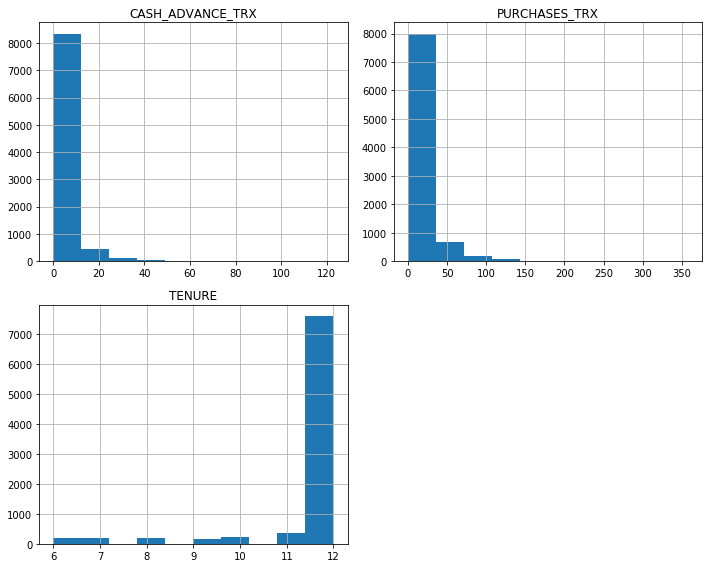

In [13]:
#int. values in histogram

df[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

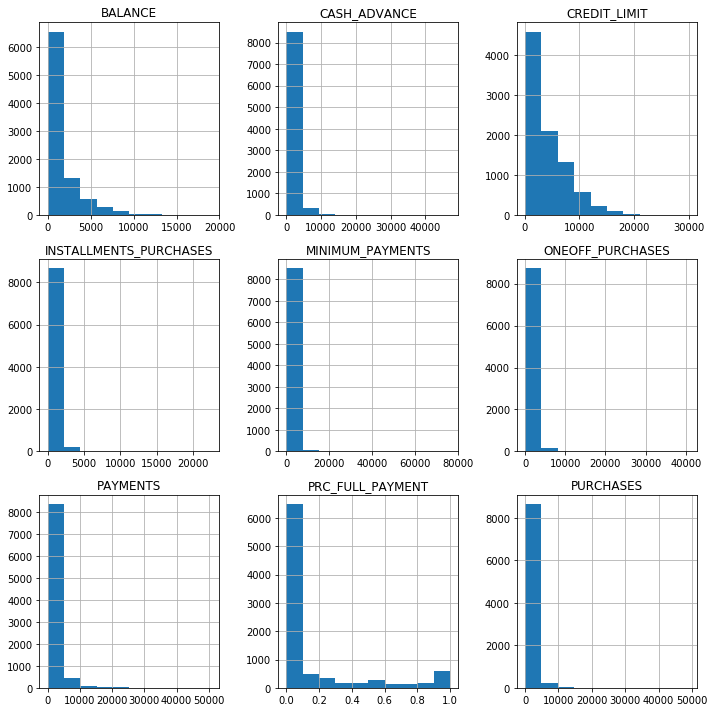

In [14]:
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

Text(0, 0.5, 'BALANCE')

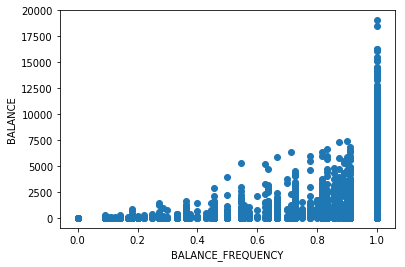

In [15]:
plt.scatter(df['BALANCE_FREQUENCY'], df['BALANCE'])
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('BALANCE')

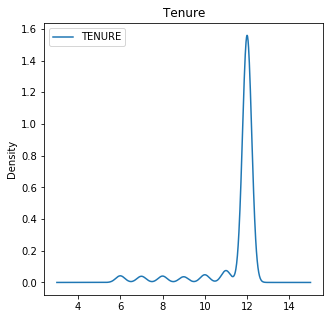

In [16]:
df[['TENURE']].plot.kde(figsize=(5,5),title='Tenure')

We have a clear view of tenure on customer level.

Text(0.5, 1.0, 'Correlation Matrix')

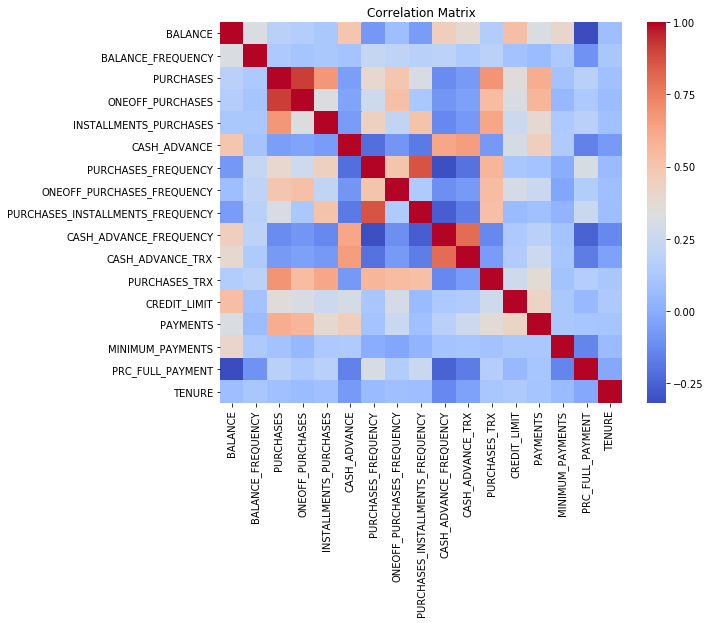

In [17]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit. 
Payments variable has a high correletion with Purchases and one off Purchases.
Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables. 

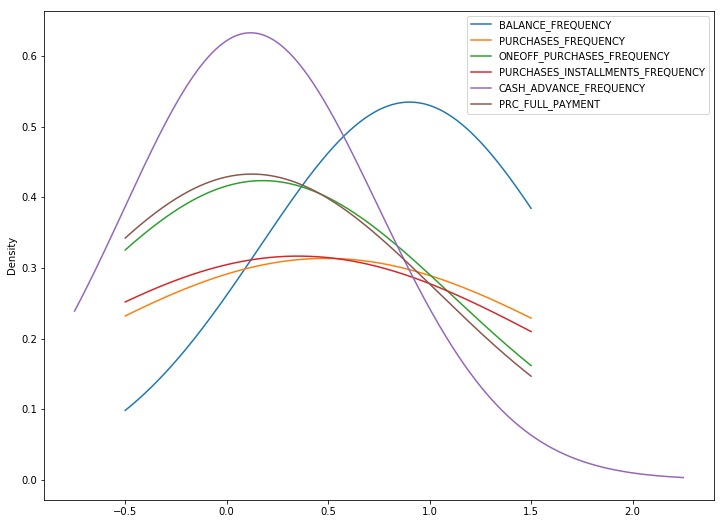

In [18]:
ax = df[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']].plot.kde(figsize=(12,9), bw_method=3) #,ind=[0, 2, 3,4]

## <div align='center'> <font color='blue'> 4. Overview about Outliers

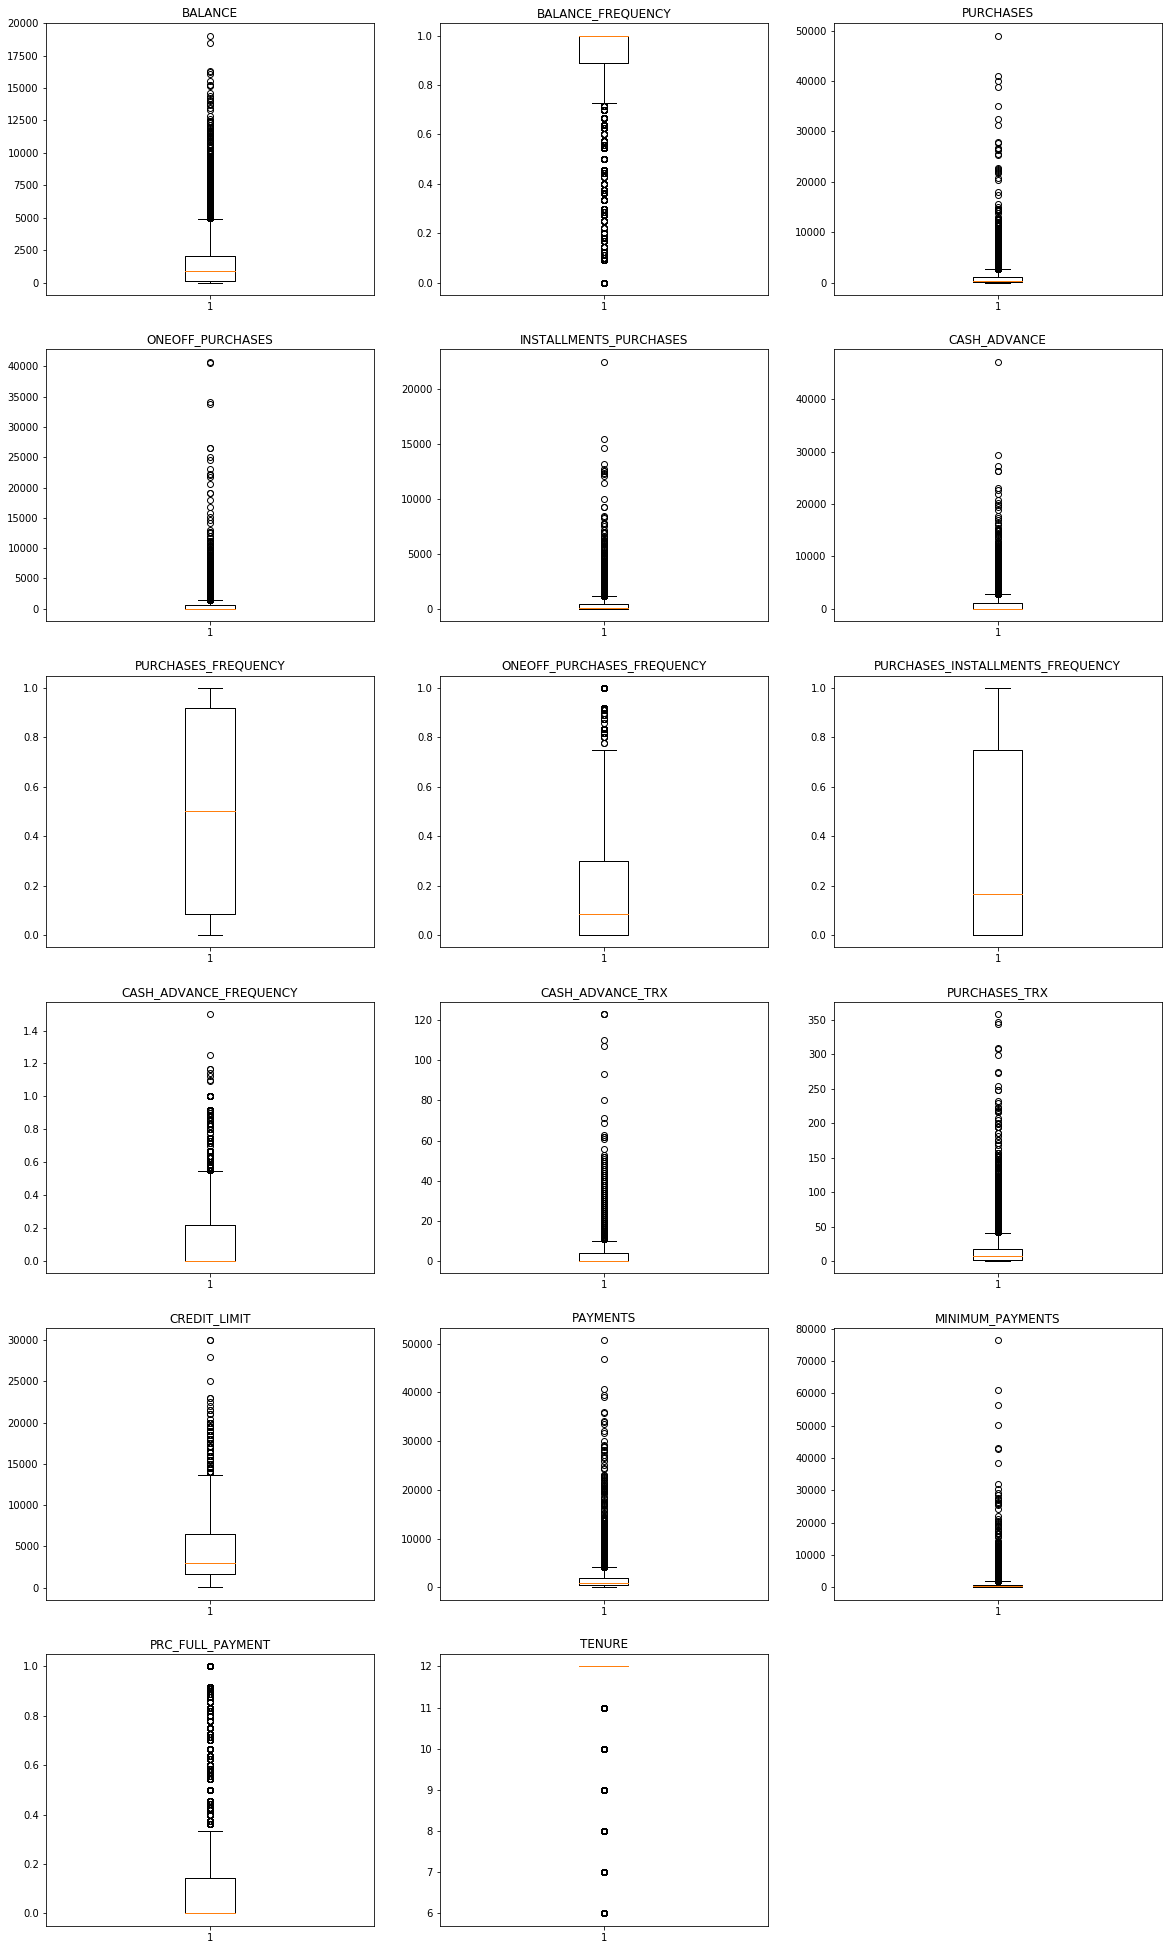

In [19]:
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

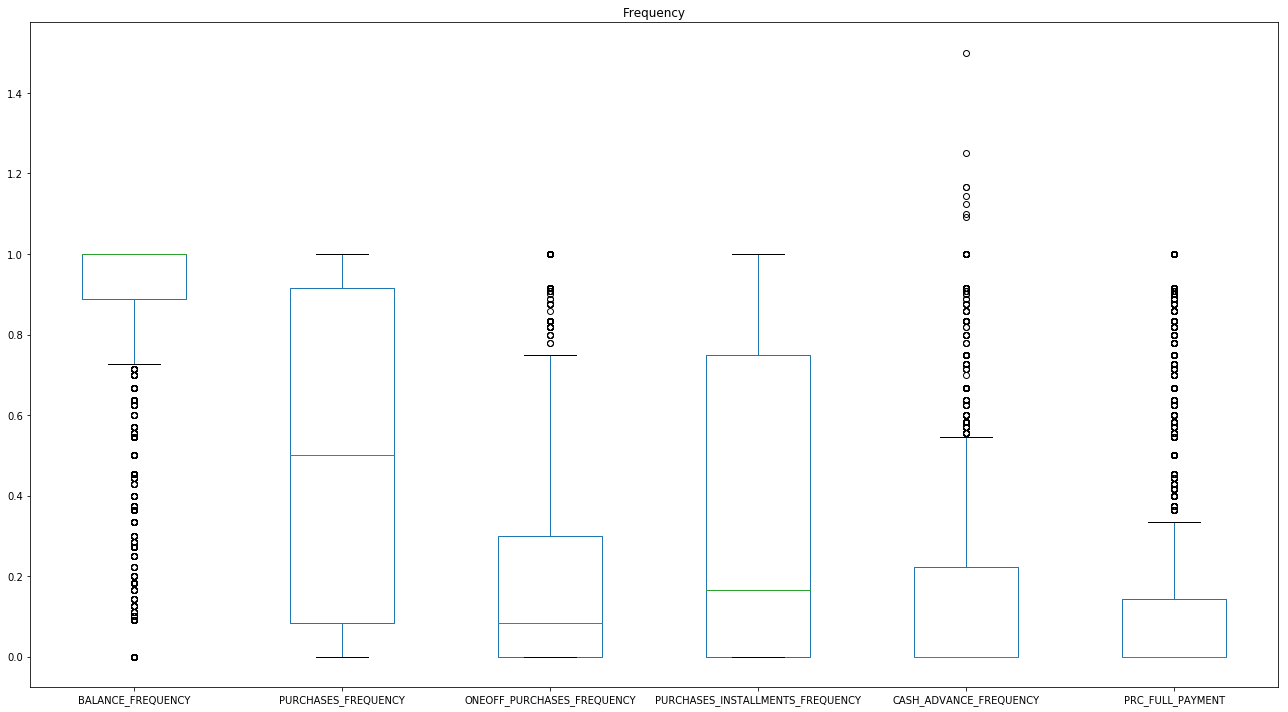

In [20]:
df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

Outliers will stay as it is. My aim is to define clusters within data rthym itself. 

## <div align='center'> <font color='blue'> 5.  Checking for NULL Values

In [21]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE_FREQUENCY        0
dtype: int64

## <div align='center'> <font color='blue'> 6.  Filling of the Row Data

In [22]:
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 

In [23]:
df.CREDIT_LIMIT      = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean()) 

In [24]:
df.isnull().sum().sort_values(ascending=False).head()

TENURE                        0
ONEOFF_PURCHASES_FREQUENCY    0
BALANCE_FREQUENCY             0
PURCHASES                     0
ONEOFF_PURCHASES              0
dtype: int64

#### New column names have been amended to the data set for the further steps. 

In [25]:
df.columns= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# <div align='center'> <span style="color:blue"> 7.Clustering Methods

Rewriting each histogram as a vector by using Euclidean distance.

In [26]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

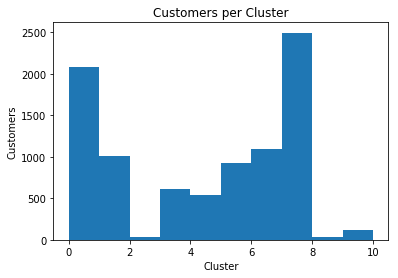

In [27]:
# Custumers per cluster

n_clusters = 10

clustering = KMeans(n_clusters=n_clusters,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(df_std)

# plot cluster sizes

plt.hist(cluster_labels, bins=range(n_clusters+1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

# <div align='center'> <span style="color:blue"> 7.1  Kmeans

# <div align='center'> <span style="color:blue"> 7.1.a Determining Number of Clusters with Elbow Method

In [28]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

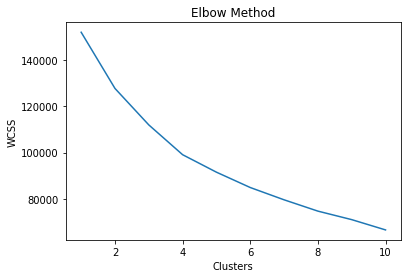

In [29]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

# <div align='center'> <span style="color:blue"> 7.1.b Determining Number of Clusters with Silhouette Scores Method

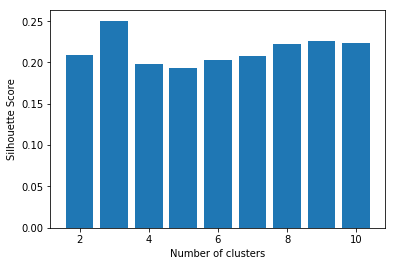

In [30]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In order to make a decision I checked Silhouette Scores. Even though, 3rd cluster model gives the highest score, I considered somewhere in 6th,7th and 8th clusters.

# <span style="color:Blue"> <div align='center'> 7.1.c Kmeans Clustering
### Kmeans with Different Number of Clusters from 2 to 20

In [31]:
kmeans_values=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.210
Silhouette score for 3 cluster k-means: 0.250
Silhouette score for 4 cluster k-means: 0.198
Silhouette score for 5 cluster k-means: 0.193
Silhouette score for 6 cluster k-means: 0.203
Silhouette score for 7 cluster k-means: 0.215
Silhouette score for 8 cluster k-means: 0.222
Silhouette score for 9 cluster k-means: 0.213
Silhouette score for 10 cluster k-means: 0.220
Silhouette score for 11 cluster k-means: 0.217
Silhouette score for 12 cluster k-means: 0.216
Silhouette score for 13 cluster k-means: 0.219
Silhouette score for 14 cluster k-means: 0.199
Silhouette score for 15 cluster k-means: 0.221
Silhouette score for 16 cluster k-means: 0.206
Silhouette score for 17 cluster k-means: 0.200
Silhouette score for 18 cluster k-means: 0.203
Silhouette score for 19 cluster k-means: 0.207


Deciding, between 4th cluster and the 3rd and 8th cluster models will be completed at the end of this study by charts.

In [32]:
kmeans8 = df_std.copy() 

In [33]:
kmeans8_  = KMeans(n_clusters=8, random_state=40).fit(kmeans8) #without 'predict' we do not labels yet.

In [34]:
#If I would like to contiune with this model, I would add the clusters to the dataframe by following command.
#df['Kmeans_cluster']=kmeans8_.labels_

# <span style="color:Blue"> <div align='center'> 7.2 Hierarchical Clustering

In [35]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [36]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
1,2,0.840813,average,2
4,4,0.808091,average,4
2,2,0.786555,complete,2
5,4,0.779261,complete,4
7,6,0.756536,average,6
10,8,0.709597,average,8
13,10,0.669882,average,10
16,12,0.668982,average,12
19,14,0.660499,average,14
8,6,0.659815,complete,6


I also would like to check further values in this method as below. 

I could catch similar value of %70 in 8 cluster model.
Due to the results, I choose linkage_method :average , number of cluster:8
The silhouette score of the Agglomerative Clustering solution: 0.7095

# <span style="color:Blue"> <div align='center'> 7.3 DBSCAN

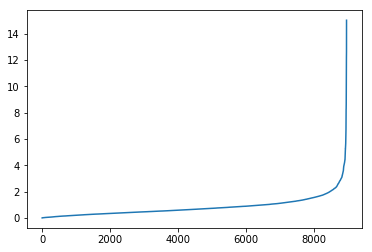

In [37]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_std)
distances, indices = nbrs.kneighbors(df_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Until around 8000th variable eps is under 2. density is too much in the general data set Here we can also see 

In [38]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,2,0.2):
    for min_sample in range(1,10):
        dbscan = DBSCAN(eps=eps, min_samples= min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [39]:
df_dbscan.sort_values('sil_score', ascending=False).head()

,eps,min_samples,sil_score,number_of_clusters
85,1.9,5,0.461593,2
86,1.9,6,0.455942,2
87,1.9,7,0.450568,2
88,1.9,8,0.447075,2
89,1.9,9,0.442959,2


In [40]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_std)
        sil_score = metrics.silhouette_score(df_std, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [41]:
df_dbscan.sort_values('sil_score', ascending=False).tail()

,eps,min_samples,sil_score,number_of_clusters
30,1.3,1,-0.399305,1536
7,0.3,9,-0.404209,15
6,0.3,5,-0.424475,42
16,0.7,5,-0.438837,29
11,0.5,5,-0.443701,39


Even though, checking the silhouette score to choose the best DBSCAN metric does not give the best model for our data set. 
This method seems not a suitable one for our desired model even with a high silhouette score. The reason behind this is that we have a high number of variables in the same cluster itself but distribution of variables does not distributes homogenous in all clusters.

However,In order to see differences in clusters, I chose the one with 1 minimum sample and 10 clusters with eps:9.5 which gives DBSCAN silhouette_score of 0.751. 

# <span style="color:Blue"> <div align='center'> 7.4 Spectral Clustering

In [42]:
# Normalizing the Data 
df_nor = normalize(df_std) 

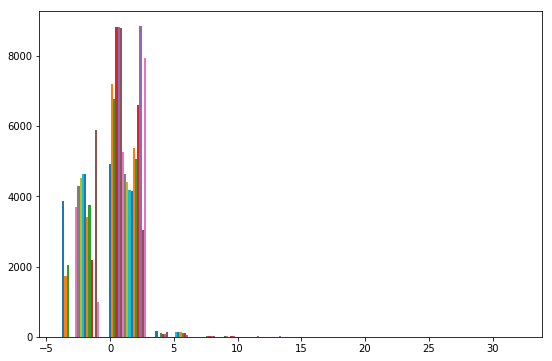

In [43]:
plt.figure(figsize=(9,6))
plt.hist(df_std)
plt.show()

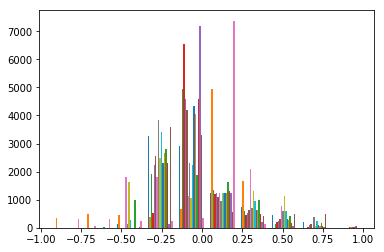

In [44]:
plt.hist(df_nor)
plt.show()

### Checking Spectral Values in Different 'n_neighbours' and 'Clusters' 

In [45]:
silhouette_list_spectral= []

for cluster in range(2,10):
    for neighbours in np.arange (3,10,2):
        spectral = SpectralClustering(n_clusters=cluster, affinity="nearest_neighbors",n_neighbors=neighbours, assign_labels='discretize',
                                      random_state=40).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std,spectral, metric='euclidean')
        silhouette_list_spectral.append((cluster,sil_score, neighbours))

    
df_spectral= pd.DataFrame(silhouette_list_spectral, columns=['cluster', 'sil_score', 'neighbours'] )

In [46]:
df_spectral.sort_values('sil_score', ascending= False)

,cluster,sil_score,neighbours
2,2,0.183570,7
3,2,0.183292,9
1,2,0.179584,5
7,3,0.157830,9
6,3,0.155333,7
0,2,0.122591,3
4,3,0.112528,3
19,6,0.062498,9
11,4,0.057035,9
15,5,0.053066,9


3, 5, 7, and 9 n_neighbours models give the highest Silhouette scores in 7 number of clusters.  I chose the 3 n_neighbour model.

# <span style="color:Blue"> <div align='center'> 7.5 GMM 

K-means does not account for variance. This works fine for when your data is circular. In contrast, Gaussian mixture models can handle even very oblong clusters. 
Therefore, I also would like to check this method to see the results of an unsupervised machine learning purpose. 

In [47]:
siliuette_list_GMM = []

for cluster in range(2,21,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, gmm, metric='euclidean')
        siliuette_list_GMM.append((cluster, sil_score, covariance_type, len(set(gmm)) ) )
        
df_gmm = pd.DataFrame(siliuette_list_GMM, columns=['cluster', 'sil_score','covariance_type', 'number_of_clusters'])

In [48]:
df_gmm.sort_values('sil_score', ascending=False).tail()

,cluster,sil_score,covariance_type,number_of_clusters
26,14,-0.014418,diag,14
30,16,-0.016816,diag,16
32,18,-0.040461,full,18
34,18,-0.047410,diag,18
38,20,-0.053200,diag,20


Silhouette scores are very low. 
Spherical covariance type worked better in the model in 10 clusters. 

# <div align = "center"> <span style="color:Blue">  8. Compering Results for the Optimal Number of Cluster Model

In [49]:
kmeans_      = KMeans(n_clusters=8, random_state=40).fit_predict(df_std)

In [50]:
gmm_         = GaussianMixture(n_components=10, covariance_type='spherical', random_state=40).fit_predict(df_std)

In [51]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=7).fit_predict(df_std)

In [52]:
spectral_    = SpectralClustering(n_clusters=7, affinity="rbf", n_neighbors=5, assign_labels='discretize',
                                  random_state=40).fit_predict(df_nor)

In [53]:
dbscan       = DBSCAN(eps=9.5, min_samples=1).fit_predict(df_std)

In [54]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')
GMM_Silhouette_Score          = metrics.silhouette_score(df_std, gmm_, metric='euclidean')
DBSCAN_Silhouette_Score       = metrics.silhouette_score(df_std, dbscan, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(df_std, hierarchical_, metric='euclidean')
Spectral_Silhouette_Score     = metrics.silhouette_score(df_std, spectral_, metric='euclidean')

In [55]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['GMM', GMM_Silhouette_Score],
                                ['Hierarchical',Hierarchical_Silhouette_Score ], ['Spectral', Spectral_Silhouette_Score],
                                ['DBSCAN', DBSCAN_Silhouette_Score]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
2,Hierarchical,0.756460
4,DBSCAN,0.751460
0,KMeans,0.221971
1,GMM,0.152825
3,Spectral,0.138689


**Although the Hierarchical method seems more suitable with a high silhouette score, after checking clusters and the number of variables in each cluster, this method seems that it is not a suitable one to understand this data set.**

## Hierarchical Method Chart 

In [56]:
df['cluster'] = hierarchical_ 

In [57]:
df['cluster'].value_counts()

0    8921
2      18
4       4
1       4
6       1
5       1
3       1
Name: cluster, dtype: int64

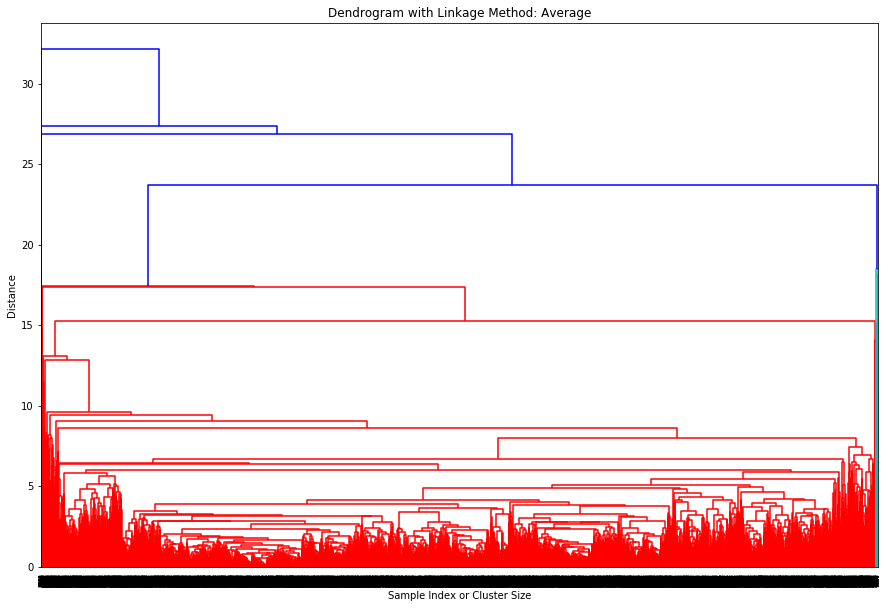

In [58]:
plt.figure(figsize=(15,10)) 
plt.title("Dendrogram with Linkage Method: Average") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(df_std, method='average')) 
plt.show() 

**This insufficient interpretation of the model on data set can be seen by the results above.** 


**DBSCAN, as a second option was also used to see distribution of variables in clusters.**

In [59]:
#Adding clusters from the selected dbscan model to the data set.

df['cluster'] = dbscan 

In [60]:
df['cluster'].value_counts()

0    8941
7       1
6       1
5       1
4       1
3       1
2       1
9       1
1       1
8       1
Name: cluster, dtype: int64

**Clearly, density is very much in the first cluster and lower number of variables in other clusters.**

**However, checking cluster numbers and distribution of variables in each cluster shows that this method is not convenient for this data set.** 

**I continued with Kmeans. In the following sections, we can see the difference in two choices of kmeans models.**

# <span style="color:blue"> <div align='center'> 9. DIMENSION REDUCTION

# <span style="color:Blue"> <div align='center'> 9.1 PCA 

**Here, we will see the results after dimension reduction methods.**

**Considering our choice of Kmeans model, I will continue with Kmeans with 8 clusters. (At the end of this study we also see the customer segmentation difference in 4 clusters Kmeans Model)**


**PCA, T-SNE, and UMAP will be used in the following sections to see the differences and how it affects our Kmeans models.** 

In [61]:
#Following up with this model, I added the clusters to the dataframe by following command.

kmeans_       = KMeans(n_clusters=8, random_state=40).fit(df_std)

df['cluster'] = kmeans_.labels_


In [62]:
# Normalizing the Data 
df_nor = normalize(df_std) 


# View the new feature data's shape 
df_nor.shape 

(8950, 17)

#### PCA in 2 Dimensions

In [63]:
# PCA 2 dimensions

pca = PCA(n_components=2).fit(df_nor)

df_pca2 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (8950, 17)
transformed shape: (8950, 2)


In [64]:
#Result in a DataFrame

df_pca = pd.DataFrame(df_pca2) 
df_pca.columns = ['A1', 'A2']
df_pca.head()

,A1,A2
0,-0.489826,-0.679679
1,-0.518791,0.545009
2,0.330885,0.268979
3,-0.482374,-0.092112
4,-0.563289,-0.481916


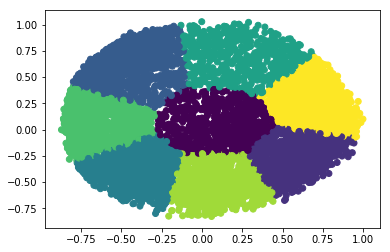

In [65]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c = KMeans(n_clusters=8, random_state=40).fit_predict(df_pca2), cmap =None) 
plt.show()

In [66]:
print(pca.explained_variance_)

[0.28409283 0.1799108 ]


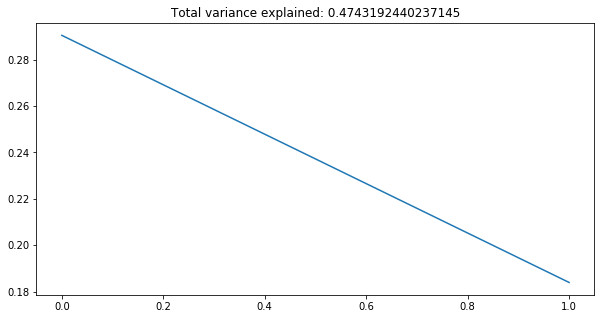

In [67]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

In [68]:
# PCA 3 dimension

pca = PCA(n_components=3).fit(df_nor)

df_pca3 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca2.shape)

original shape:    (8950, 17)
transformed shape: (8950, 2)


In [69]:
df_pca3 = pd.DataFrame(df_pca3) 
df_pca3.columns = ['A1', 'A2', 'A3']
df_pca3.head()

,A1,A2,A3
0,-0.489826,-0.679678,-0.097457
1,-0.518791,0.545011,0.196408
2,0.330885,0.268978,0.115880
3,-0.482374,-0.092111,0.453703
4,-0.563289,-0.481915,-0.256499


In [70]:
df_pca3.columns = ['A1', 'A2','A3'] 

In [71]:
fig = px.scatter_3d(df_pca3, x=df_pca3['A1'], y= df_pca3['A2'], z=df_pca3['A3'], color=df['cluster']) 

fig.show()

In [72]:
print(pca.explained_variance_)

[0.28409283 0.1799108  0.10786813]


If we would like to use PCA dimension reduction, PCA in 3 dimensions gives a better score of explained variance.

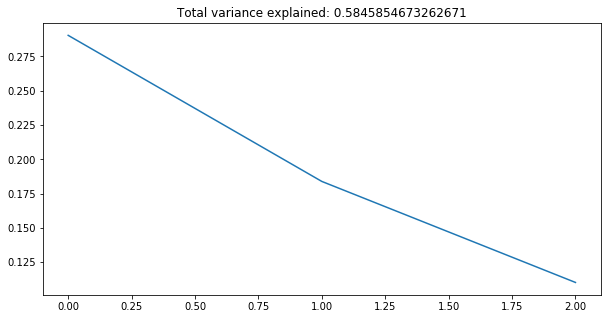

In [73]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

# <span style="color:Blue"> <div align='center'> 9.2 T-SNE

## Setting T-SNE 2 Dimensions

In [74]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_tsne2 = tsne.fit_transform(df_nor)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.012s...
[t-SNE] Computed neighbors for 8950 samples in 1.860s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.161905
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.096222
[t-SNE] KL divergence after 300 iterations: 2.504767


In [75]:
#df_tsne2.tolist()

In [76]:
# Store results of T-SNE in a data frame
result =  pd.DataFrame(df_tsne2, columns=['TSNE%i' % i for i in range(2)])

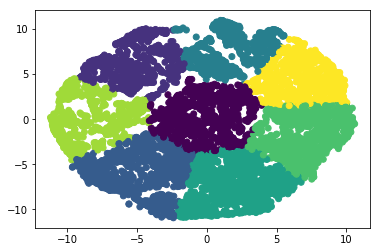

In [77]:
plt.scatter(result['TSNE0'], result['TSNE1'],
            c  = KMeans(n_clusters=8, random_state=40).fit_predict(df_tsne2), cmap =None) 
plt.show()

# <span style="color:Blue"> <div align='center'> 9.3 UMAP

**UMAP is a nonlinear dimensionality reduction algorithm in the same family as t-SNE. In the first phase of UMAP, a weighted k nearest neighbor graph is computed, in the second a low dimensionality layout of this is then calculated. Then the embedded data points can be visualized in a new space and compared with other variables of interest.**

In [78]:
import umap

In [79]:
fit= umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')
#umap_results=fit.fit_transform(df_nor)

In [80]:
umap_results=fit.fit_transform(df_nor)

In [81]:
umap_results.shape

(8950, 2)

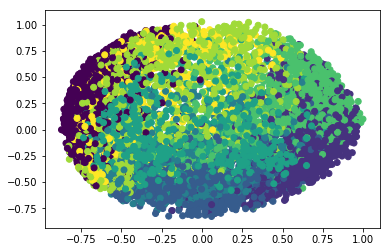

In [82]:
plt.scatter(df_pca['A1'], df_pca['A2'],
            c= KMeans(n_clusters=8, random_state=40).fit_predict(umap_results), cmap =None) 
plt.show()

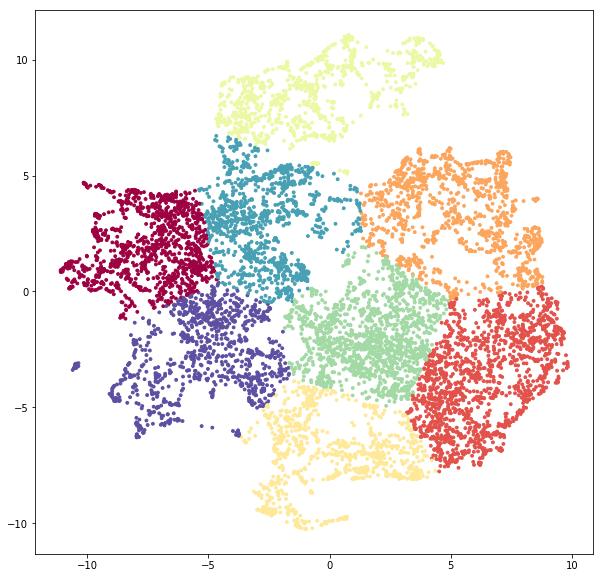

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(umap_results[:, 0], umap_results[:, 1], cmap='Spectral',
            c = KMeans(n_clusters=8, random_state=40).fit_predict(umap_results), s=8) 


**After checking all dimension reduction Methods with their graphs, clearly we do not need any of those methods.** 

# <div align = "center"> <span style="color:Blue"> 10.  Understanding Clusters by Customer Segmentation

## 10.1 Kmeans Model with 8 Clusters

kmeans8_  = KMeans(n_clusters=8, random_state=40).fit(df_std)
df['cluster'] = kmeans8_.labels_

|CL     |BALANCE|PURCH|ONEOFF_PURC|INST_PURC|CASH_ADV|CASH_ADV_TRX|PURCH_TRX|CREDIT_LMT|PAYMENTS|MIN_PAYMENTS|PRC_FULL_PAYMENT|
|:-----:|:-----:|:---:|:---------:|:-------:|:------:|:----------:|:-------:|:--------:|:------:|:----------:|:--------------:|
|CL0    | LOW   | LOW |   LOW     | LOW     |  LOW   |   MED      |  LOW    |  MED     |  MED   |    LOW     |    MED         | 
|CL1    | MED   | LOW |   LOW     | MED     |  LOW   |   LOW      |  MED    |  MED     |  LOW   |   HIGH     |    MED         |
|CL2    | MED   | LOW |   LOW     | MED     | HIGH   |   MED      |  LOW    |  LOW     |  LOW   |    LOW     |    MED         |
|CL3    | HIGH  | MED |   LOW     | MED     | HIGH   |   HIGH     |  MED    |  MED     |  HIGH  |   HIGH     |    LOW         |
|CL4    | HIGH  | HIGH|  HIGH     | HIGH    | HIGH   |   HIGH     |  HIGH   |  HIGH    |  HIGH  |   HIGH     |    HIGH        |
|CL5    | MED   | LOW |   LOW     | LOW     | MED    |   MED      |  LOW    |  LOW     |  MED   |    MED     |    LOW         |
|CL6    | MED   | MED |   MED     | MED     |: MED   |   MED      |  MED    |  MED     |  MED   |    LOW     |    MED         |

|  CL   |BALANCE_FRE|PURCH_FREQ|ONEOFF_PURCH_FREQ|PURCH_INST_FREQ|CASH_ADV_FREQ |TENURE|
|:-----:|:---------:|:--------:|:---------------:|:-------------:|:------------:|:----:|
|CL0    |   LOW     |   LOW    |     LOW         |     LOW       |     LOW      |:----:|
|CL1    |  HIGH     |   HIGH   |     LOW         |     HIGH      |     LOW      |:----:|
|CL2    |   LOW     |   LOW    |     MED         |     LOW       |     MED      |:----:|
|CL3    |  HIGH     |   LOW    |     MED         |     LOW       |     MED      |:----:|
|CL4    |  HIGH     |   HIGH   |     HIGH        |     HIGH      |     LOW      |:----:|
|CL5    |  HIGH     |   MED    |     MED         |     LOW       |     LOW      |:----:|
|CL6    |  HIGH     |   HIGH   |     HIGH        |     MED       |     LOW      |:----:|


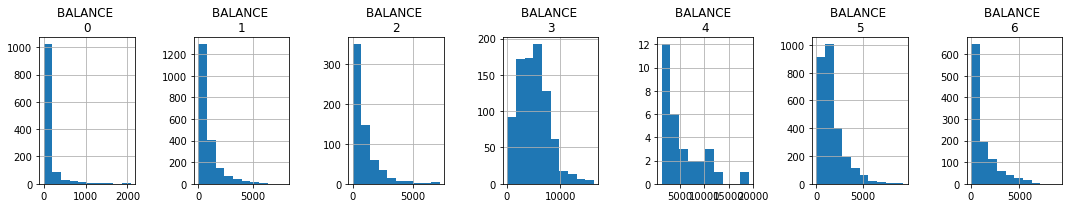

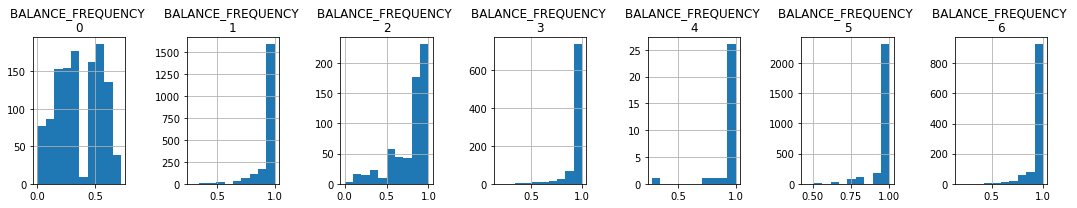

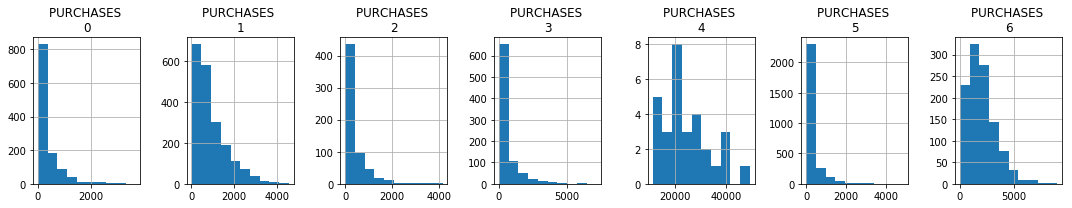

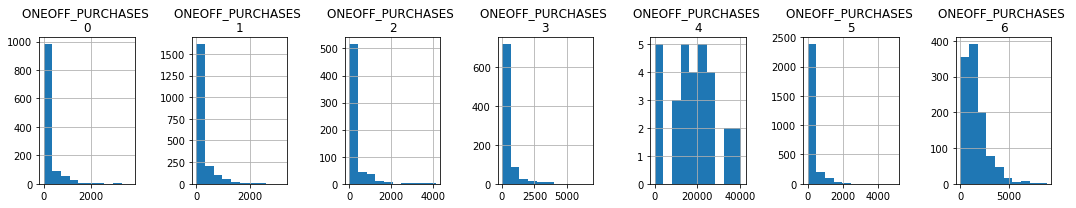

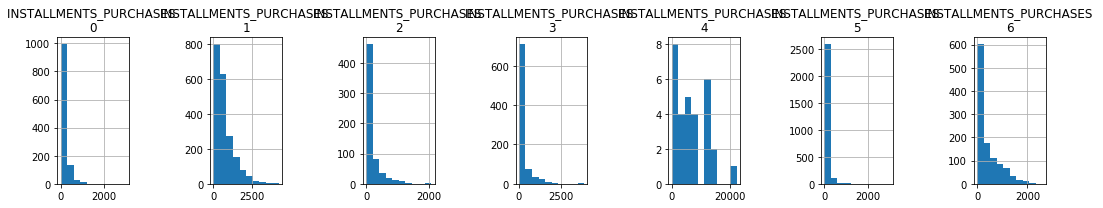

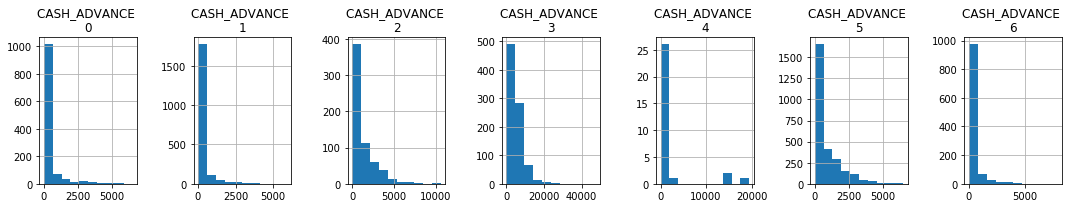

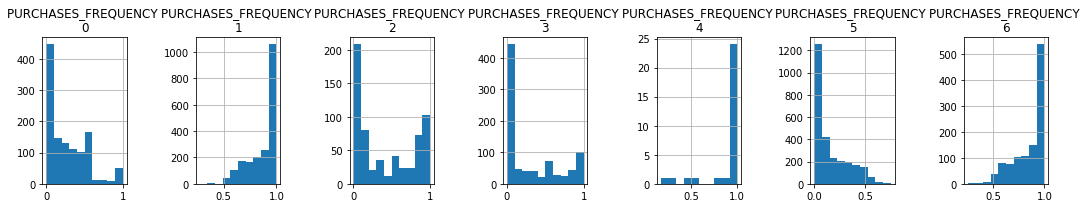

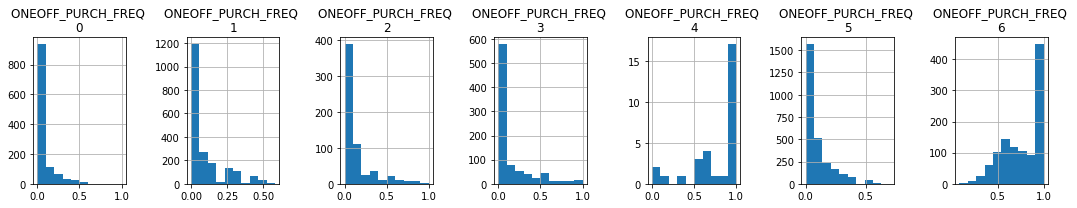

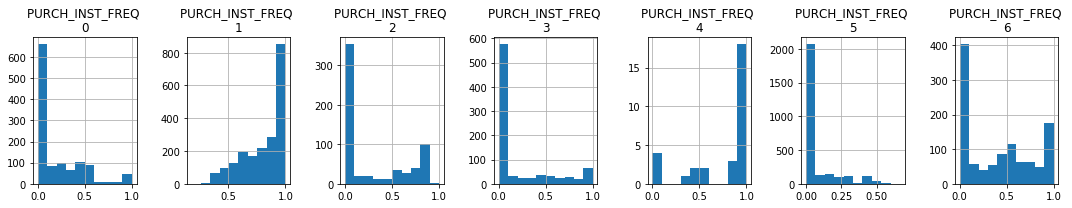

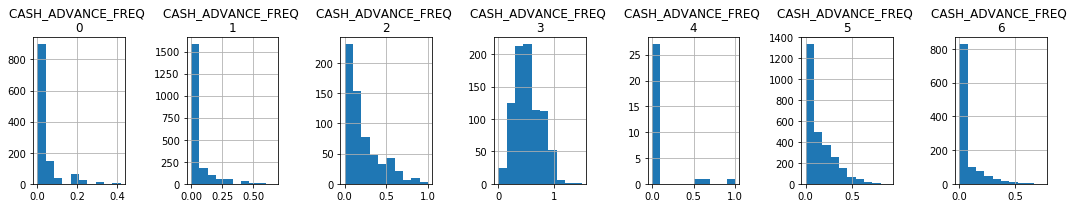

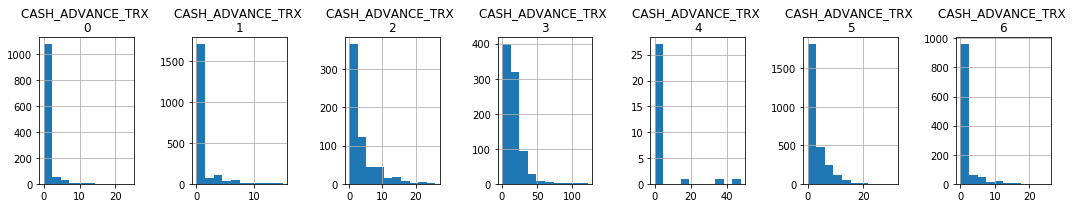

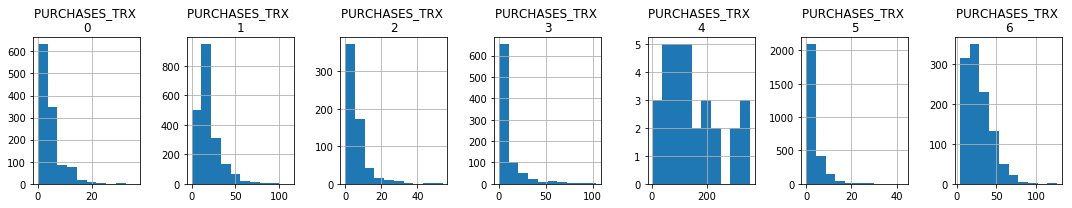

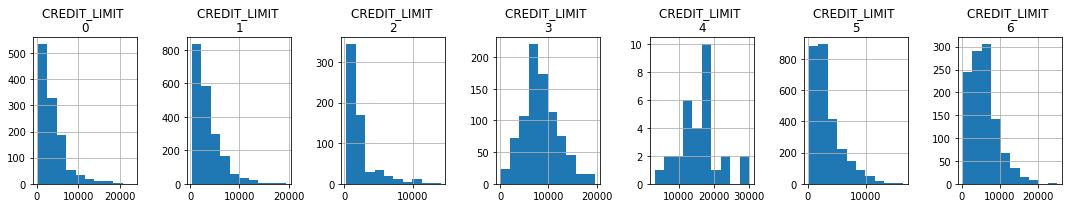

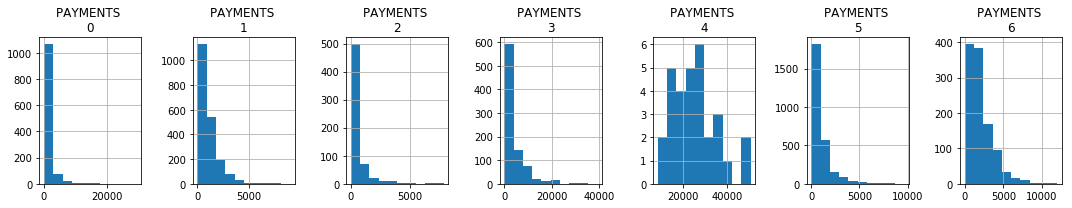

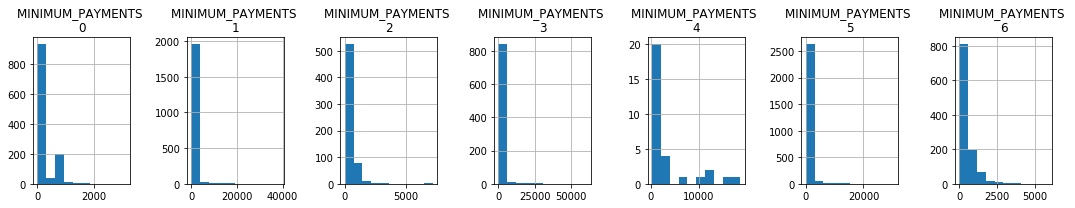

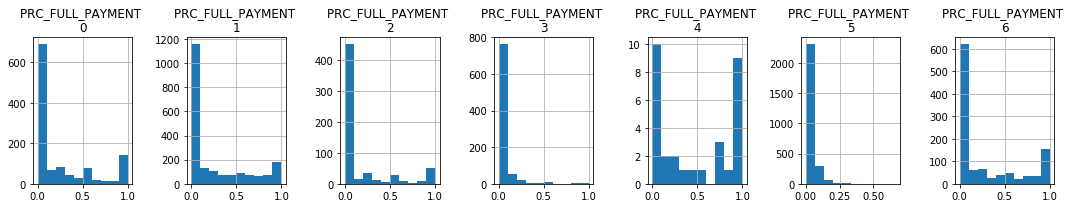

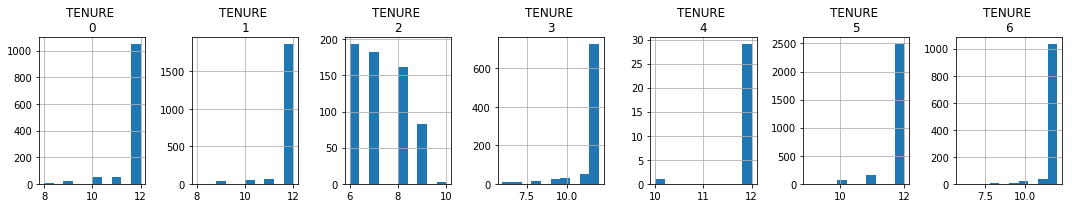

In [84]:
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,7):
        plt.subplot(1,7,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()
    

    

In [85]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6])

Text(0, 0.5, 'PAYMENTS')

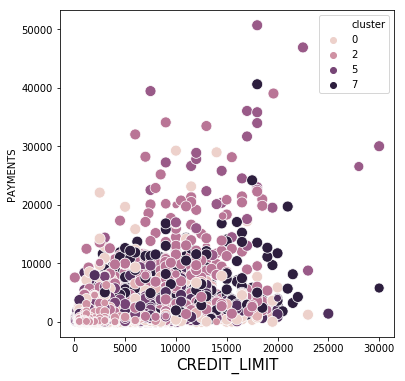

In [86]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='CREDIT_LIMIT', y='PAYMENTS', hue='cluster',data=df, s = df.TENURE*10);
plt.xlabel('CREDIT_LIMIT',size=15)
#plt.xlim([0,40000])
plt.ylabel('PAYMENTS', size =10)

<Figure size 1800x1800 with 0 Axes>

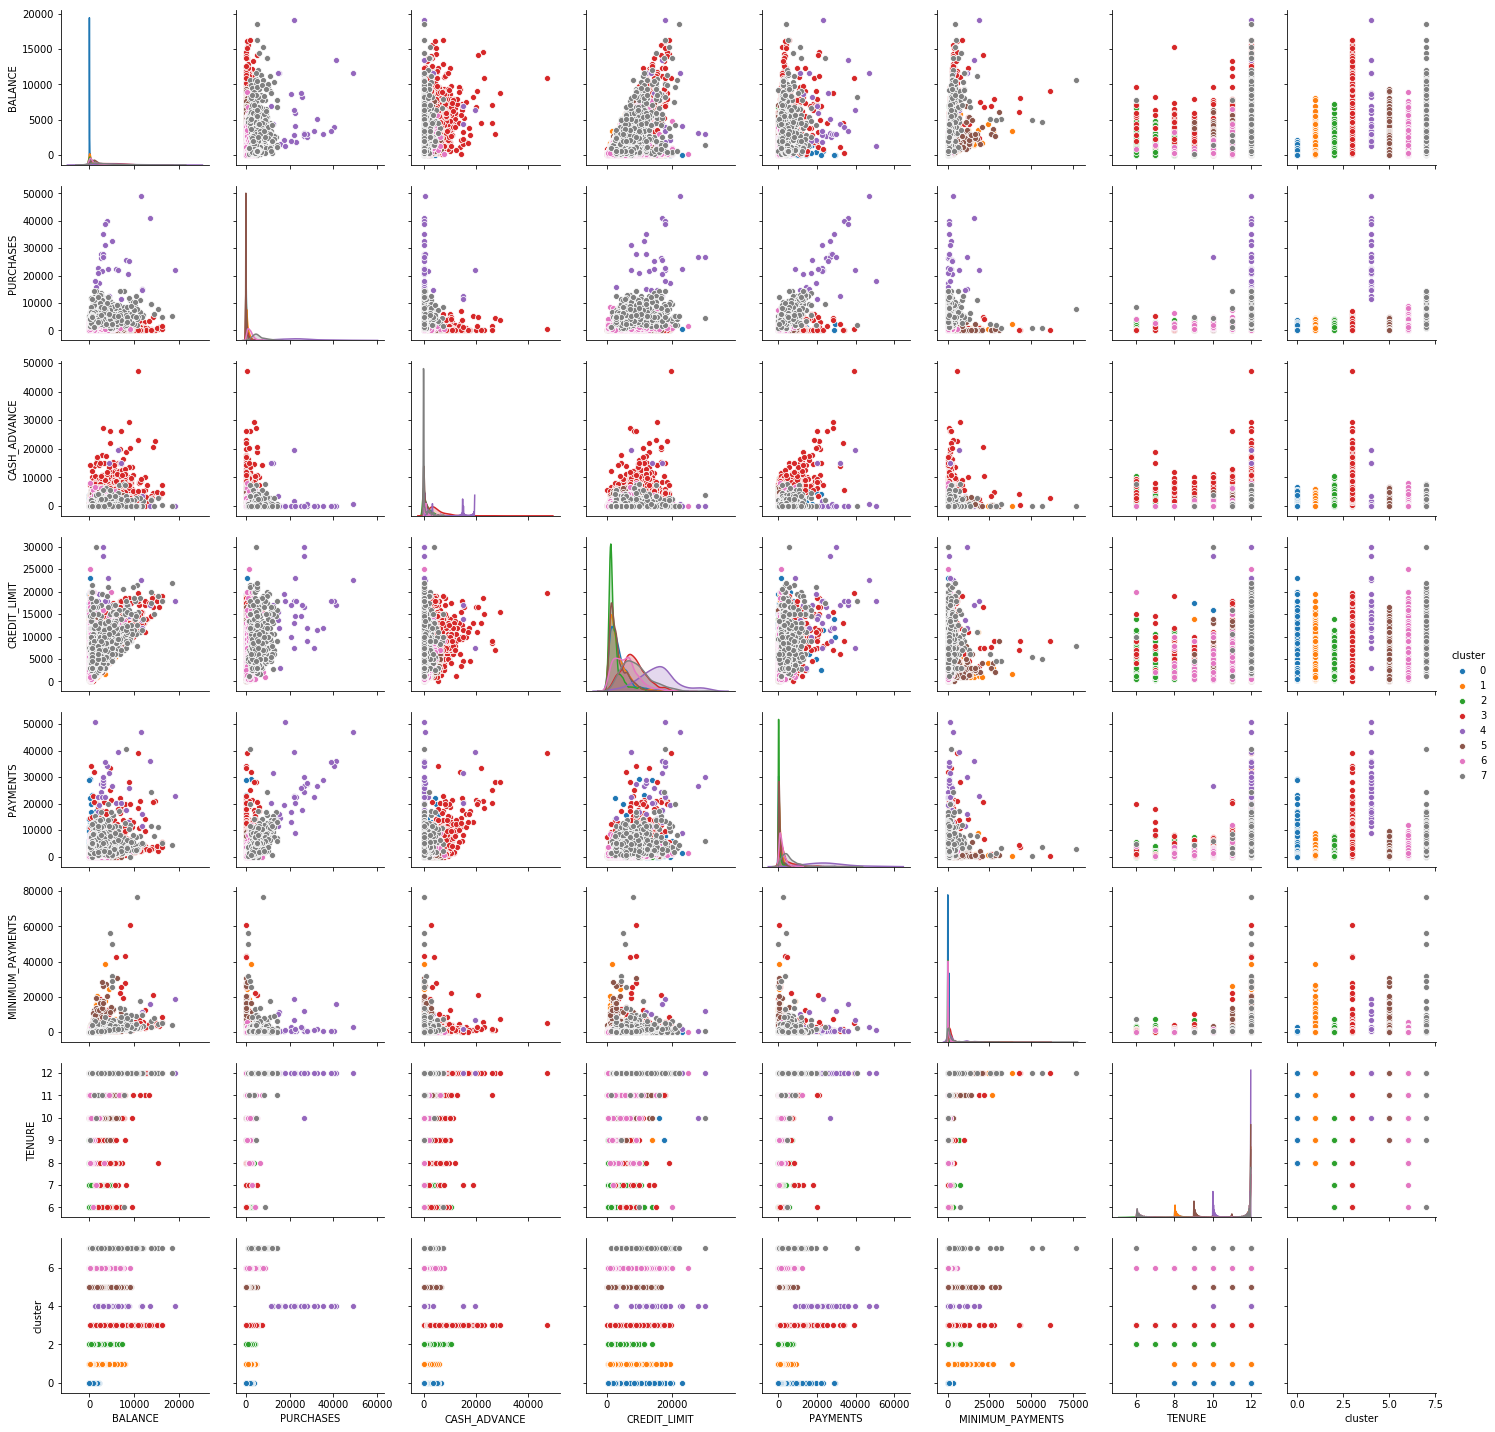

In [87]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

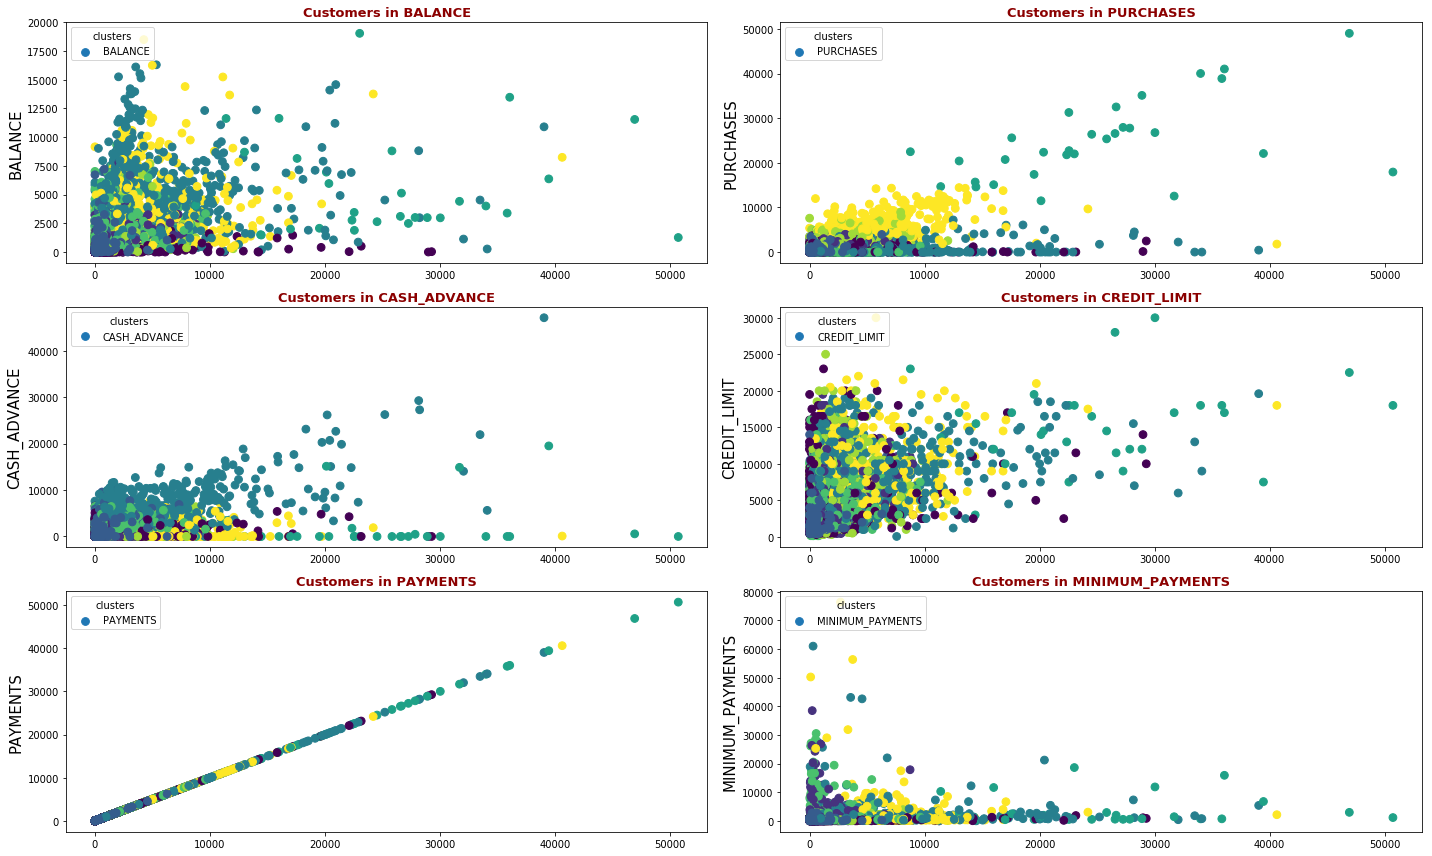

In [88]:
fig, axes = plt.subplots(3,2,figsize=(20,12))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 14 }

for i in range(0,6):
    
    plt.subplot(3, 2, i+1)
    plt.scatter(df['PAYMENTS'], df[best_columns[i]], c= df['cluster'], s=60)
    legend = plt.legend(loc="upper left", title="clusters")
    plt.title('Customers in '+ str(best_columns[i]), fontdict=title_font, fontsize=13)
    #plt.xlabel('customer_behaviours',size=15)
    plt.ylabel(str(best_columns[i]),size=15)
    

plt.tight_layout()
plt.show()


**This study aims to understand the customer behaviours based on credit card users.**

  * *Large Payments* are done by a small group with expensive purchases and a credit limit that is between average and high.
  * *Small group of people have a higher amount of *Cash Advance* especially after  payments of 30.000. Large group of people have a lower cash limit contrats large payments.
  * *Credit Limit is very low on a large group of customers with little purchases. 
   


## 10.2 Kmeans Model with 4 Clusters

In [89]:
kmeans4_  = KMeans(n_clusters=4, random_state=40).fit(df_std)
df['cluster'] = kmeans4_.labels_


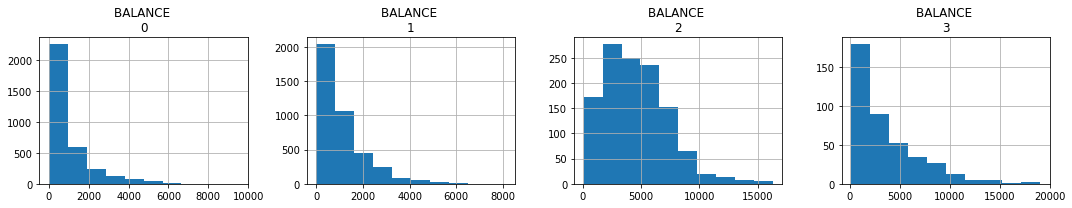

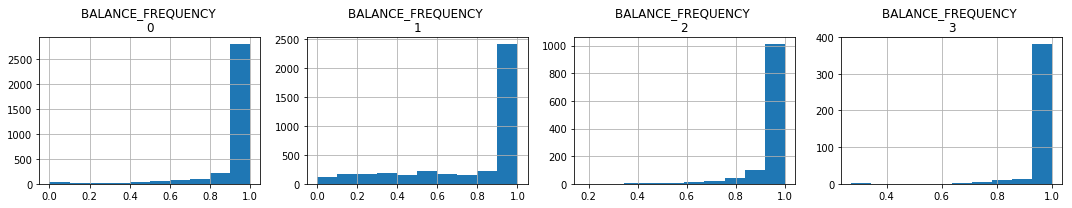

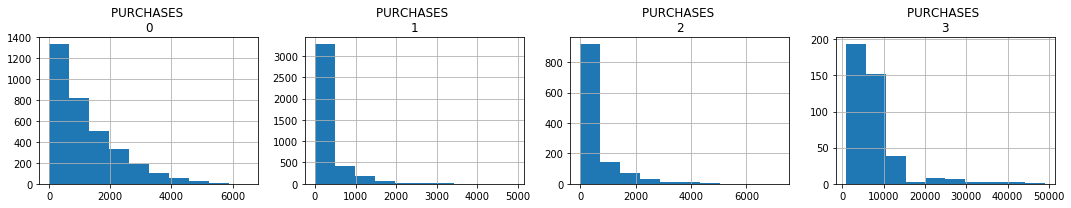

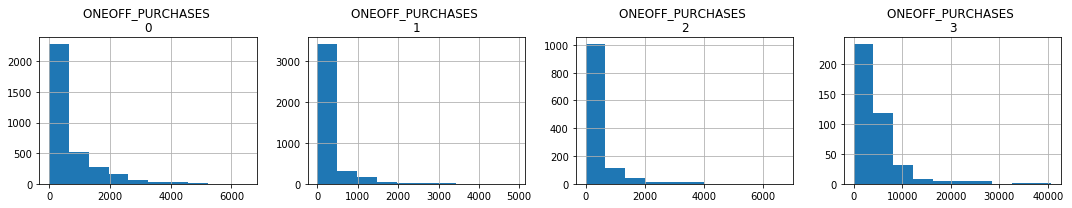

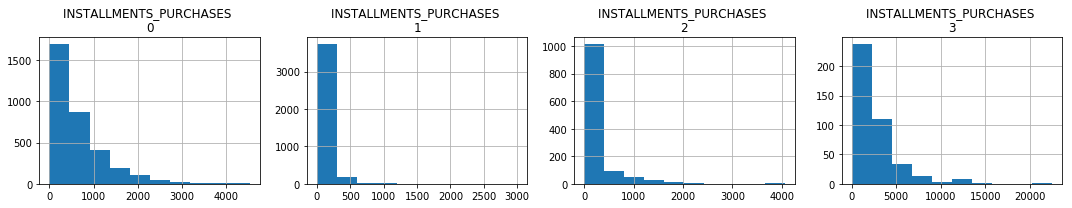

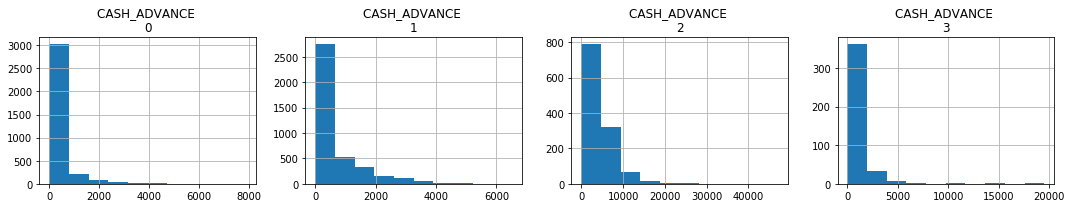

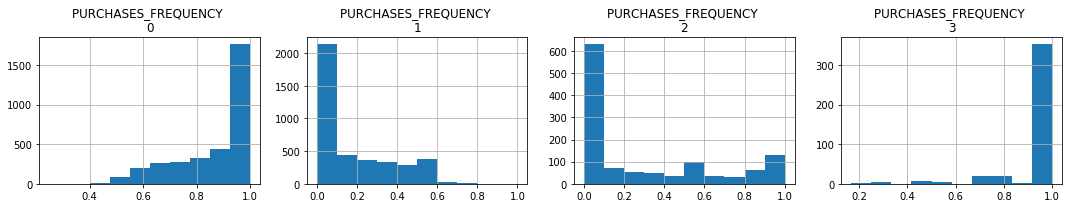

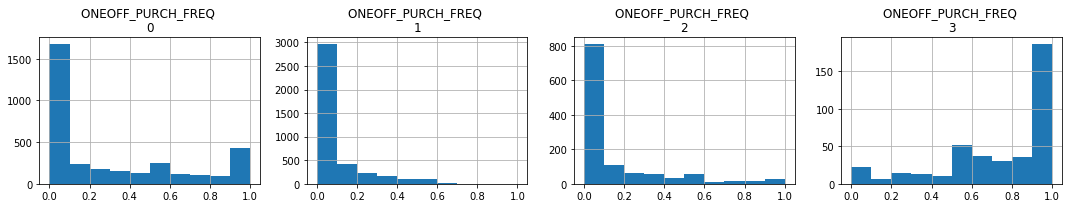

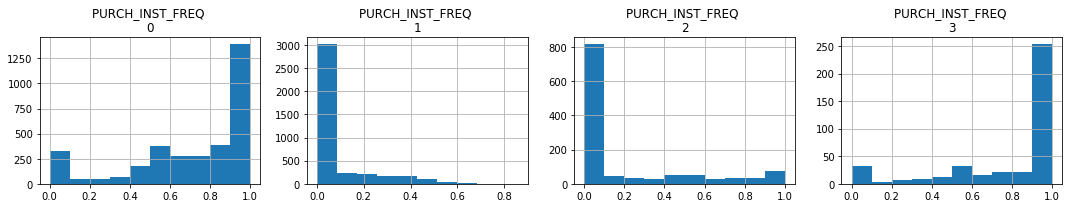

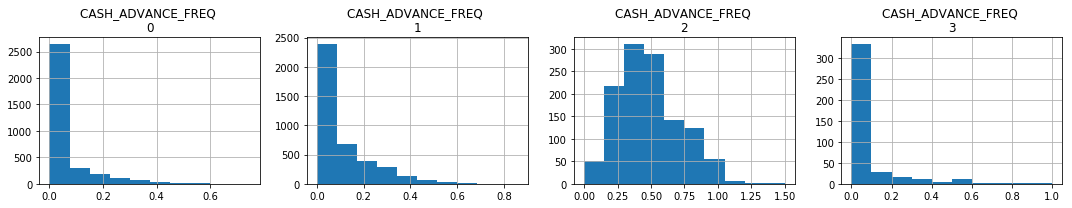

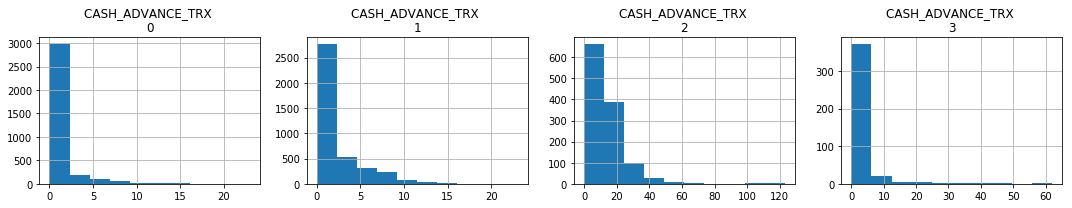

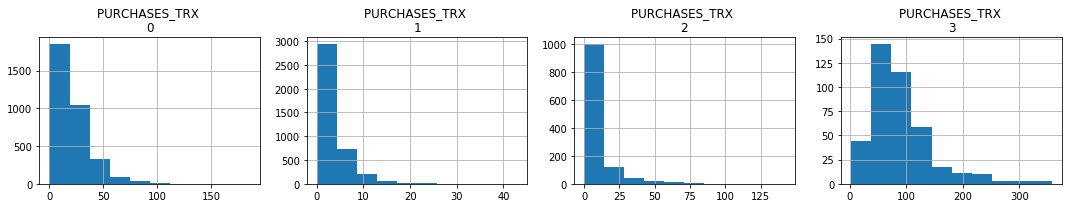

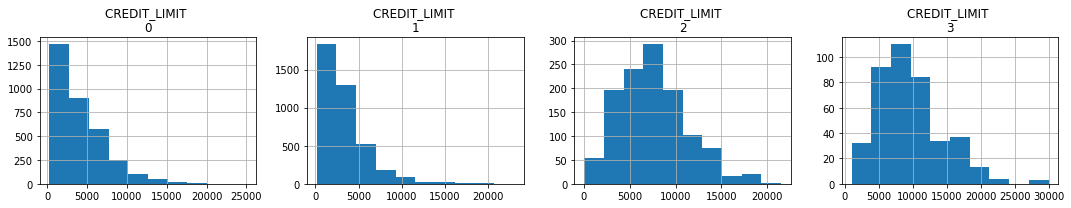

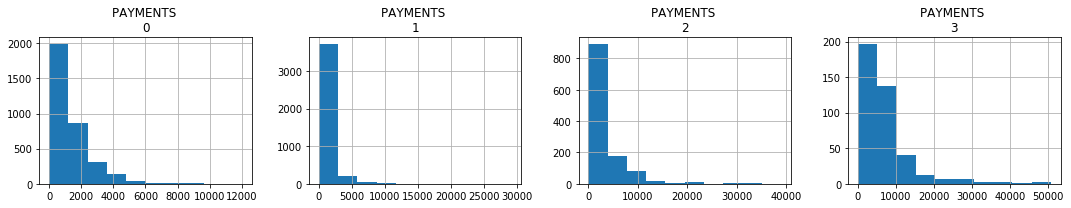

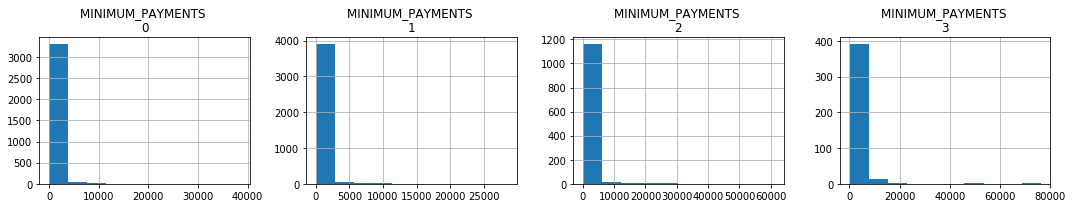

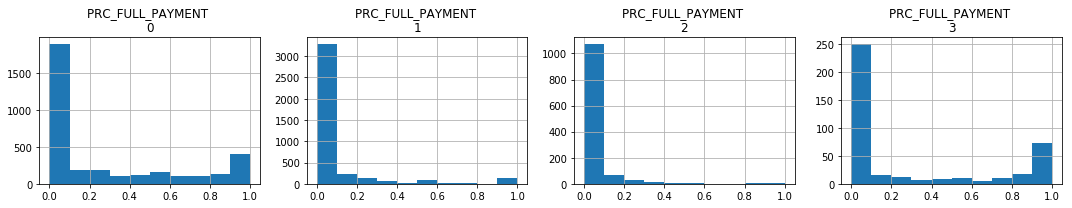

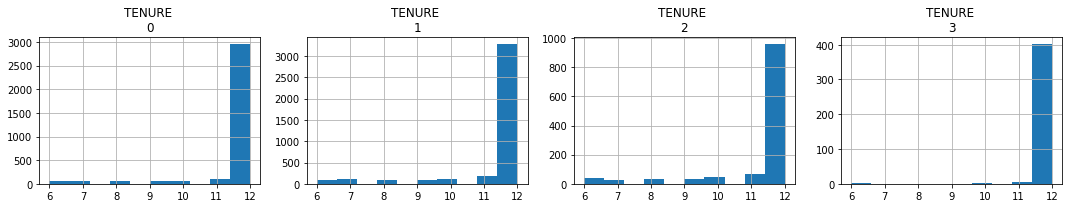

In [90]:
col_list= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,4,i+1)
        cluster = df[df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()
    

|CL     |BALANCE|PURCH|ONEOFF_PURC|INST_PURC|CASH_ADV|CASH_ADV_TRX|PURCH_TRX|CREDIT_LMT|PAYMENTS|MIN_PAYMENTS|PRC_FULL_PAYMENT|
|:-----:|:-----:|:---:|:---------:|:-------:|:------:|:----------:|:-------:|:--------:|:------:|:----------:|:--------------:|
|CL0    | LOW   | LOW |   LOW     | LOW     |  LOW   |   MED      |  LOW    |  LOW     |  LOW   |   LOW      |    HIGH        | 
|CL1    | MED   | LOW |   LOW     | MED     |  LOW   |   LOW      |  MED    |  MED     |  MED   |   MED      |    MED         |
|CL2    | MED   | LOW |   LOW     | MED     | HIGH   |   MED      |  LOW    |  HIGH    |  HIGH  |   HIGH     |    HIGH        |
|CL3    | HIGH  | MED |   LOW     | MED     | HIGH   |   HIGH     |  MED    |  LOW     |  LOW   |   LOW      |    LOW         |

|  CL   |BALANCE_FRE|PURCH_FREQ|ONEOFF_PURCH_FREQ|PURCH_INST_FREQ|CASH_ADV_FREQ |TENURE|
|:-----:|:---------:|:--------:|:---------------:|:-------------:|:------------:|:----:|
|CL0    |  HIGH     |   HIGH   |     MED         |     HIGH      |     LOW      |:----:|
|CL1    |  HIGH     |   LOW    |     LOW         |     LOW       |     LOW      |:----:|
|CL2    |   MED     |   MED    |     LOW         |     MED       |     HIGH     |:----:|
|CL3    |  HIGH     |   HIGH   |     HIGH        |     HIGH      |     LOW      |:----:|

<Figure size 1800x1800 with 0 Axes>

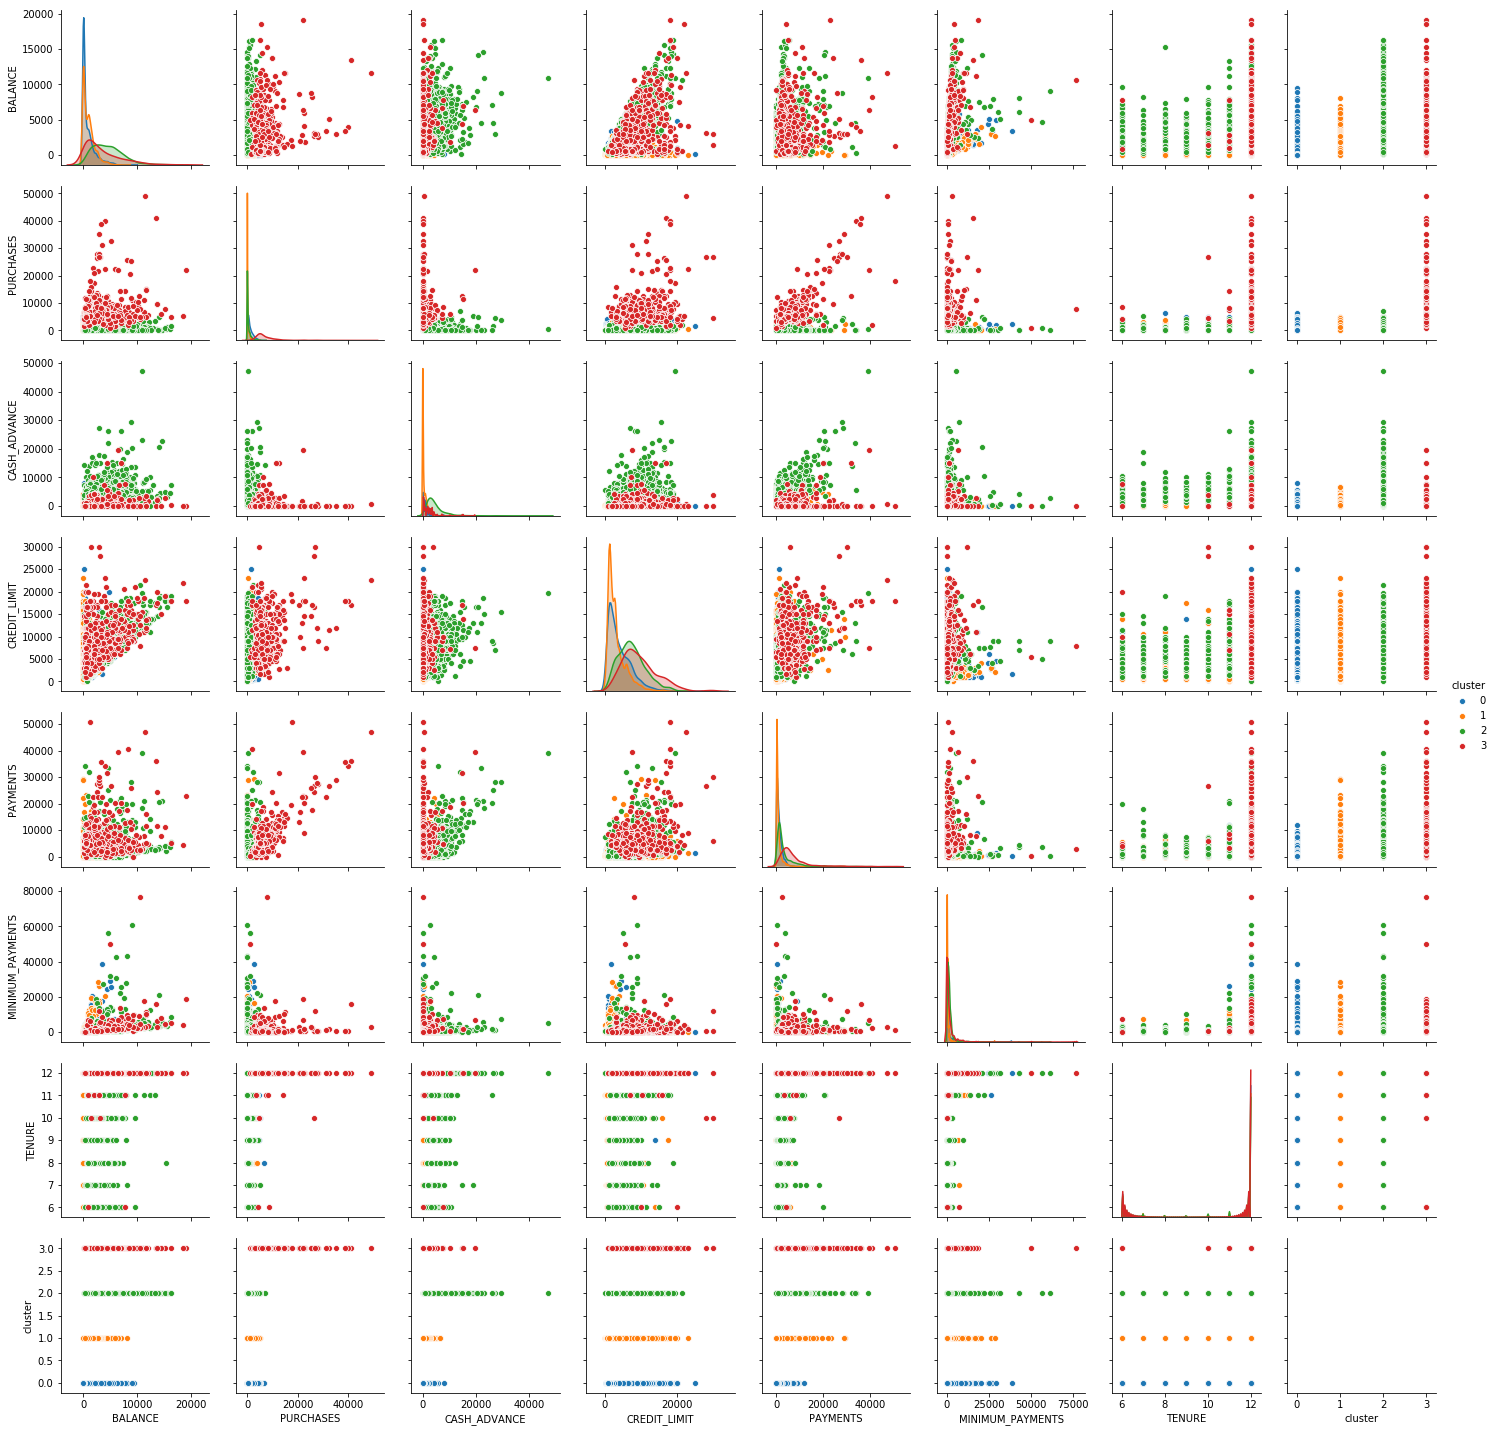

In [91]:
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="cluster")

# <div align = "center"> <span style="color:Blue">  11. Conclusion

After executing different methods, I chose the Kmeans Model as data does not include different small groups but very similar in each other. Therefore, I did not prefer to use density-based algorithms.  I can use this kind of algorithms to research for extreme customers in a credit card fraud. This study aims customer segmentation by using customer behaviors.


Compering 2 different Kmeans Models showed that we have a better understanding of customer segmentation by using the 8 clusters model.
**Some of the outstanding results:**

* **Cluster 0:** This customer group indicates a small group of customers who are small spenders with the lowest minimum payment. 

* **Cluster 1:** These customers purchase frequently with the highest installment purchase frequency percentage contrast of a lower cash advance percentage. This group is using their credit cards for a small number of purchases. 

* **Cluster 2:** This segment points out new customers with a lower credit limit and average balance level.

* **Cluster 3:** This cluster targets a group of customers who have a high balance and cash advances. This group also has a low purchase frequency.  We can assume that this customer segment uses their credit cards as a loan.

* **Cluster 4:** A small group of customers with the highest credit limit and the highest minimum payments. We can assume that these customers tend to increase credit limits to follow up on their spending habits. 

* **Cluster 5:** This segment has the lowest INSTALLMENTS_PURCHASES and PRC_FULL_PAYMENT percentages.  

* **Cluster 6:** It is a similar customer segment with cluster 4 but with a lower Minimum Payment percentage. 
